###### Nigel K. Gondo: Data Warrior Analytics

###### BInary Classification - Titanic Dataset

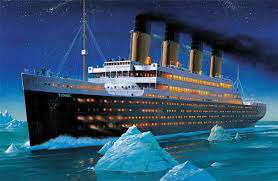

In [1]:
from PIL import Image
Image.open('titanic.jpeg')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Brief-description" data-toc-modified-id="Brief-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Brief description</a></span></li><li><span><a href="#Importing-relevant-libraries" data-toc-modified-id="Importing-relevant-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing relevant libraries</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Cleaning-the-training-data" data-toc-modified-id="Cleaning-the-training-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cleaning the training data</a></span><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>EDA</a></span></li></ul></li><li><span><a href="#Cleaning-the-test-data" data-toc-modified-id="Cleaning-the-test-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cleaning the test data</a></span></li></ul></li></ul></div>

# Brief description

The purpose of this project was to find a classification solution for the titanic dataset. This is a popular classification problem available on Kaggle, which is there to classify which passengers survived or died taking certain variables into account. I ran several classification models from logistic regression to random forest and the model that managed to achieve the best accuracy was the support vector machine classifier.

# Importing relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
sns.set()
sns.set_style('white')

# Data Wrangling

## Cleaning the training data

In [3]:
#importing the train set data
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking on data type
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Dropping unnecessary columns
df_train_2 = df_train.drop(columns=['PassengerId', 
                                    'Name', 
                                    'Ticket', 
                                    'Cabin'], 
                           axis=1)
df_train_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
#checking on data types
df_train_2.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [7]:
#changing dtypes
df_train_2.Survived = df_train_2.Survived.astype('category')
df_train_2.Pclass = df_train_2.Pclass.astype('category')
df_train_2.Sex = df_train_2.Sex.astype('category')
df_train_2.SibSp = df_train_2.SibSp.astype('category')
df_train_2.Parch = df_train_2.Parch.astype('category')
df_train_2.Embarked = df_train_2.Embarked.astype('category')

In [8]:
df_train_2.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

In [9]:
#checking for null vaules
df_train_2.isnull().sum() #The age column has quite a number of missing values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
#filling missing values of age with the mean
df_train_2['Age'].fillna(df_train_2['Age'].mean(),
                         inplace=True)

In [11]:
#droping null values
df_train_3 = df_train_2.dropna()

In [12]:
#checking if null values were dropped
df_train_3.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
#summary statistics
df_train_3.describe()

,Age,Fare
count,889.000000,889.000000
mean,29.653446,32.096681
std,12.968366,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,29.699118,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [14]:
#slipping the data that has to be one hot encoded and standardised
df_train_encode = df_train_3[['Sex', 
                              'Embarked']]

df_train_standardise = df_train_3[['Age', 
                                   'Fare']]

df_train_caegorised = df_train_3[['Survived', 
                                  'Pclass', 
                                  'SibSp', 
                                  'Parch']]

In [15]:
#One hot encoding 
ct = ColumnTransformer(transformers = [('encoder',
                                        OneHotEncoder(), 
                                        [0,1])], 
                       remainder='passthrough')

df_train_encoded = np.array(ct.fit_transform(df_train_encode))

df_train_encoded[:5]


array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [16]:
#standarding
sc = StandardScaler()
df_train_scaled = sc.fit_transform(df_train_standardise)
df_train_scaled[:5]

array([[-0.59049493, -0.50023975],
       [ 0.64397101,  0.78894661],
       [-0.28187844, -0.48664993],
       [ 0.41250865,  0.42286111],
       [ 0.41250865, -0.4841333 ]])

In [17]:
#splitting the x_train and y_train
array_categorised = df_train_caegorised.to_numpy()

X_train = np.concatenate((array_categorised[:,-3:],
                          df_train_scaled, 
                          df_train_encoded), 
                         axis = 1)

Y_train = array_categorised[:,:-3].flatten()

### EDA

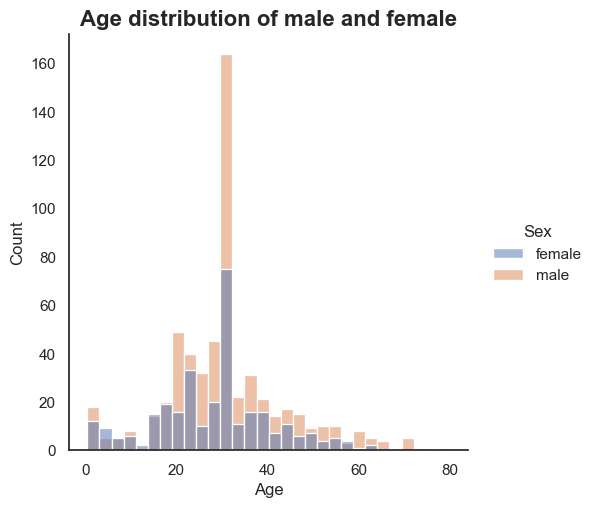

In [18]:
#distribution of the age for male and female
sns.displot(x = 'Age',
             hue = 'Sex', 
             data = df_train_3)

plt.title('Age distribution of male and female', 
          fontweight = 'bold', 
          fontsize = 16)

plt.show()

The age of both genders seems to be normally distributed.

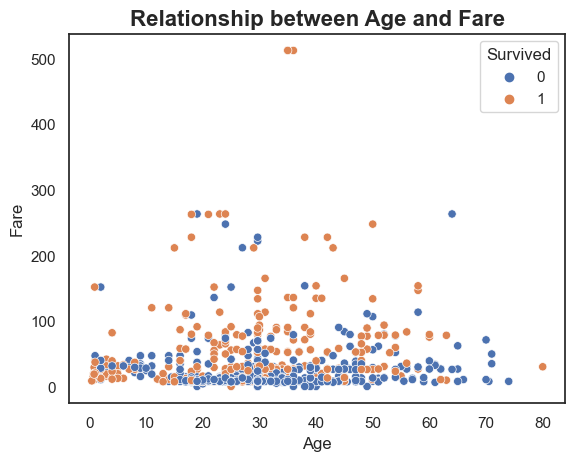

In [19]:
#scatter plot
sns.scatterplot(x = 'Age', 
                y = 'Fare', 
                hue = 'Survived',
                data = df_train_3)

plt.title('Relationship between Age and Fare', 
          fontweight = 'bold', 
          fontsize = 16)

plt.show()

From the scatter plot it seems that the higher the fare you paid the higher the chance you survived.

## Cleaning the test data

In [20]:
#importing the test data
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
#import y test data
df_test_y = pd.read_csv('gender_submission.csv')
df_test_y.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [22]:
#joining data frame
df_test_1 = pd.merge(left = df_test_y, 
                     right = df_test, 
                     left_on = 'PassengerId', 
                     right_on = 'PassengerId')
df_test_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
#checking on data types
df_test_1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
#deleting unnecessary columns
df_test_2 = df_test_1.drop(columns = ['PassengerId',
                                      'Name', 
                                      'Ticket', 
                                      'Cabin'])
df_test_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [25]:
#changing data types tp category
df_test_2.Survived = df_test_2.Survived.astype('category')
df_test_2.Pclass = df_test_2.Pclass.astype('category')
df_test_2.Sex = df_test_2.Sex.astype('category')
df_test_2.SibSp = df_test_2.SibSp.astype('category')
df_test_2.Parch = df_test_2.Parch.astype('category')
df_test_2.Embarked = df_test_2.Embarked.astype('category')

In [26]:
#checking for null values
df_test_2.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [27]:
#filling missing values of age with the mean
df_test_2['Age'].fillna(df_test_2['Age'].mean(),
                        inplace=True)

#dropping the 1 missing value of Fare
df_test_2.dropna(inplace=True)

In [28]:
df_test_2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
#summary statistics
df_test_2.describe()

,Age,Fare
count,417.000000,417.000000
mean,30.200103,35.627188
std,12.562386,55.907576
min,0.170000,0.000000
25%,23.000000,7.895800
50%,30.272590,14.454200
75%,35.000000,31.500000
max,76.000000,512.329200


In [30]:
#sliptting the data that has to be one hot encoded and standardised
df_test_encode = df_test_2[['Sex', 
                            'Embarked']]

df_test_standardise = df_test_2[['Age', 
                                 'Fare']]

df_test_caegorised = df_test_2[['Survived',
                                'Pclass', 
                                'SibSp', 
                                'Parch']]

In [31]:
#One hot encoding 
ct2 = ColumnTransformer(transformers = [('encoder',
                                       OneHotEncoder(), 
                                       [0,1])], 
                        remainder = 'passthrough')

df_test_encoded = np.array(ct2.fit_transform(df_test_encode))

df_test_encoded[:5]

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.]])

In [32]:
#standarding
sc2 = StandardScaler()
df_test_scaled = sc2.fit_transform(df_test_standardise)
df_test_scaled[:5]

array([[ 0.34269466, -0.49781052],
       [ 1.33892384, -0.51265996],
       [ 2.53439885, -0.46453181],
       [-0.25504284, -0.48288766],
       [-0.65353451, -0.41797062]])

In [33]:
#creating the test array
test_array_categorised = df_test_caegorised.to_numpy()

X_test = np.concatenate((test_array_categorised[:,-3:],
                          df_test_scaled, 
                          df_test_encoded), 
                         axis = 1)

Y_test = test_array_categorised[:,:-3].flatten()

In [34]:
#training the model
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [35]:
#Predicting Y
y_pred = svc.predict(X_test)

In [36]:
#checking the accuracy of the model
accuracy_score(Y_test, y_pred) # 100% accuracy was achieved

1.0

In [37]:
#classification report
print(classification_report(Y_test, 
                            y_pred, 
                            zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00       152

    accuracy                           1.00       417
   macro avg       1.00      1.00      1.00       417
weighted avg       1.00      1.00      1.00       417



In [38]:
#confusion matrix
con_matrix = confusion_matrix(Y_test, y_pred)
con_matrix

array([[265,   0],
       [  0, 152]], dtype=int64)

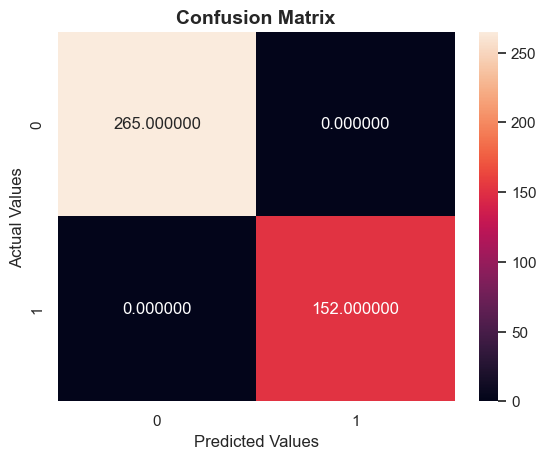

In [39]:
#plotting the confusion matrix
ax = sns.heatmap(con_matrix, 
                 annot = True, 
                 fmt = 'f')

ax.set_title('Confusion Matrix', 
             fontsize = 14, 
             fontweight = 'bold')

ax.set_xlabel('Predicted Values')

ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['0','1'])

ax.yaxis.set_ticklabels(['0','1'])

plt.show()